# Вариант п

+ ✔️метод Гаусса с выбором главного элемента
+ ✔️метод LU-разложения (если применим)
+ ✔️метод Якоби
+ ✔️метод Зейделя
+ ✔️метод верхней релаксации
+ *Метод градиентного спуска
+ *Метод минимальных невязок
+ *Стабилизированный метод бисопряженных градиентов

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
epsilon = 1e-14

N = 100

In [76]:

def norm(vec):
    return np.max(np.abs(vec))

def show_solution(A, x, f):
    print(f"Норма невязки: {norm(A @ x - f)}")
    print("Решение:")
    print(x)
    print("Невязка:")
    print(A @ x - f)
    

In [77]:
A = np.zeros((N, N))
f = np.array([1 / (i + 1) for i in range(N)])

A[0][0] = 10.0 + 1
A[0][1] = 1.0

for i in range(1, 99):
    A[i][i - 1] = 1.0
    A[i][i] = 10.0 + i + 1
    A[i][i + 1] = 1.0

A[99][0] = 1.0
A[99][99] = 1.0

for i in range(1, 99):
    A[99][i] = 2.0


## Решим систему методом Гаусса с выбором главного элемента

In [78]:
A_0 = A.copy()
f_0 = f.copy()

for i in range(N):
    max = np.abs(A_0[i][i])
    i_max = i
    for j in range(i + 1, N):
        if (max < np.abs(A_0[j][i])):
            max = np.abs(A_0[j][i])
            i_max = j
        
    for j in range(N):
        A_0[i_max][j], A_0[i][j] = A_0[i][j], A_0[i_max][j]

    for j in range(i + 1, N):
        eta = A_0[j][i] / A_0[i][i]
        for k in range(N):
            A_0[j][k] -= eta * A_0[i][k]
        f_0[j] -= eta * f_0[i]

for i in range(N - 1, -1, -1):
    for j in range(i - 1, -1, -1):
        eta = A_0[j][i] / A_0[i][i]
        A_0[j][i] -= eta * A_0[i][i]
        f_0[j] -= eta * f_0[i]

    
x_0 = np.array([f_0[i] / A_0[i][i] for i in range(N)])

show_solution(A, x_0, f)

Норма невязки: 1.3010426069826053e-16
Решение:
[ 8.79538292e-02  3.25078785e-02  2.19516293e-02  1.54542741e-02
  1.16885328e-02  9.21773371e-03  7.49439444e-03  6.23470370e-03
  5.28093893e-03  4.53856775e-03  3.94770604e-03  3.46869629e-03
  3.07430886e-03  2.74527689e-03  2.46761725e-03  2.23095850e-03
  2.02746175e-03  1.85110376e-03  1.69718855e-03  1.56200718e-03
  1.44259607e-03  1.33656231e-03  1.24195537e-03  1.15717146e-03
  1.08088150e-03  1.01197596e-03  9.49522399e-04  8.92732321e-04
  8.40935102e-04  7.93557303e-04  7.50106125e-04  7.10156087e-04
  6.73338210e-04  6.39331190e-04  6.07854150e-04  5.78660650e-04
  5.51533717e-04  5.26281688e-04  5.02734735e-04  4.80741930e-04
  4.60168763e-04  4.40895038e-04  4.22813071e-04  4.05826156e-04
  3.89847241e-04  3.74797793e-04  3.60606807e-04  3.47209960e-04
  3.34548863e-04  3.22570415e-04  3.11226238e-04  3.00472179e-04
  2.90267873e-04  2.80576358e-04  2.71363738e-04  2.62598878e-04
  2.54253144e-04  2.46300156e-04  2.3871558

## Решим систему методом LU разложения

In [79]:
L = np.zeros((N, N))
U = np.zeros((N, N))

for i in range(N):
    L[i][i] = 1

    for j in range(i, N):
        sum = 0
        for k in range(i):
            sum += L[i][k] * U[k][j]
        U[i][j] = A[i][j] - sum

    for j in range(i, N):
        sum = 0
        for k in range(i):
            sum += L[j][k] * U[k][i]
        L[j][i] = (A[j][i] - sum) / U[i][i]

v = np.zeros(N)

for i in range(N):
    v[i] = f[i]
    for j in range(i):
        v[i] -= L[i][j] * v[j]

x = np.zeros(N)

for i in range(N - 1, -1, -1):
    x[i] = v[i] / U[i][i]
    for j in range(i + 1, N):
        x[i] -= U[i][j] * x[j] / U[i][i]

show_solution(A, x, f)

Норма невязки: 1.1102230246251565e-16
Решение:
[ 8.79538292e-02  3.25078785e-02  2.19516293e-02  1.54542741e-02
  1.16885328e-02  9.21773371e-03  7.49439444e-03  6.23470370e-03
  5.28093893e-03  4.53856775e-03  3.94770604e-03  3.46869629e-03
  3.07430886e-03  2.74527689e-03  2.46761725e-03  2.23095850e-03
  2.02746175e-03  1.85110376e-03  1.69718855e-03  1.56200718e-03
  1.44259607e-03  1.33656231e-03  1.24195537e-03  1.15717146e-03
  1.08088150e-03  1.01197596e-03  9.49522399e-04  8.92732321e-04
  8.40935102e-04  7.93557303e-04  7.50106125e-04  7.10156087e-04
  6.73338210e-04  6.39331190e-04  6.07854150e-04  5.78660650e-04
  5.51533717e-04  5.26281688e-04  5.02734735e-04  4.80741930e-04
  4.60168763e-04  4.40895038e-04  4.22813071e-04  4.05826156e-04
  3.89847241e-04  3.74797793e-04  3.60606807e-04  3.47209960e-04
  3.34548863e-04  3.22570415e-04  3.11226238e-04  3.00472179e-04
  2.90267873e-04  2.80576358e-04  2.71363738e-04  2.62598878e-04
  2.54253144e-04  2.46300156e-04  2.3871558

## Решим систему методом Якоби

In [80]:
x_old = np.array([0.0 for _ in range(N)])

iterations = 0

discrepancy_jacobi = []

while norm(A @ x_old - f) >= epsilon:
    discrepancy_jacobi.append(norm(A @ x_old - f))
    x_new = np.zeros(N)
    for i in range(N):
        for j in range(N):
            if i == j:
                continue
            x_new[i] += A[i][j] * x_old[j]
        x_new[i] = (f[i] - x_new[i]) / A[i][i]
    x_old = x_new
    iterations += 1

print(f"Число итераций: {iterations}")
show_solution(A, x_new, f)

Число итераций: 19
Норма невязки: 9.112502419306168e-15
Решение:
[ 8.79538292e-02  3.25078785e-02  2.19516293e-02  1.54542741e-02
  1.16885328e-02  9.21773371e-03  7.49439444e-03  6.23470370e-03
  5.28093893e-03  4.53856775e-03  3.94770604e-03  3.46869629e-03
  3.07430886e-03  2.74527689e-03  2.46761725e-03  2.23095850e-03
  2.02746175e-03  1.85110376e-03  1.69718855e-03  1.56200718e-03
  1.44259607e-03  1.33656231e-03  1.24195537e-03  1.15717146e-03
  1.08088150e-03  1.01197596e-03  9.49522399e-04  8.92732321e-04
  8.40935102e-04  7.93557303e-04  7.50106125e-04  7.10156087e-04
  6.73338210e-04  6.39331190e-04  6.07854150e-04  5.78660650e-04
  5.51533717e-04  5.26281688e-04  5.02734735e-04  4.80741930e-04
  4.60168763e-04  4.40895038e-04  4.22813071e-04  4.05826156e-04
  3.89847241e-04  3.74797793e-04  3.60606807e-04  3.47209960e-04
  3.34548863e-04  3.22570415e-04  3.11226238e-04  3.00472179e-04
  2.90267873e-04  2.80576358e-04  2.71363738e-04  2.62598878e-04
  2.54253144e-04  2.46300

## Рещим систему методом Зейделя

In [81]:
x_old = np.array([0.0 for _ in range(N)])

iterations = 0

discrepancy_zeydel = []

while norm(A @ x_old - f) >= epsilon:
    discrepancy_zeydel.append(norm(A @ x_old - f))
    x_new = np.zeros(N)
    for i in range(N):
        x_new[i] = 0
        for j in range(i):
            x_new[i] += + A[i][j] * x_new[j]
        for j in range(i + 1, N):
            x_new[i] += A[i][j] * x_old[j]
        x_new[i] = (f[i] - x_new[i]) / A[i][i]
    x_old = x_new
    iterations += 1

print(f"Число итераций: {iterations}")
show_solution(A, x_new, f)

Число итераций: 11
Норма невязки: 4.432218481120742e-15
Решение:
[ 8.79538292e-02  3.25078785e-02  2.19516293e-02  1.54542741e-02
  1.16885328e-02  9.21773371e-03  7.49439444e-03  6.23470370e-03
  5.28093893e-03  4.53856775e-03  3.94770604e-03  3.46869629e-03
  3.07430886e-03  2.74527689e-03  2.46761725e-03  2.23095850e-03
  2.02746175e-03  1.85110376e-03  1.69718855e-03  1.56200718e-03
  1.44259607e-03  1.33656231e-03  1.24195537e-03  1.15717146e-03
  1.08088150e-03  1.01197596e-03  9.49522399e-04  8.92732321e-04
  8.40935102e-04  7.93557303e-04  7.50106125e-04  7.10156087e-04
  6.73338210e-04  6.39331190e-04  6.07854150e-04  5.78660650e-04
  5.51533717e-04  5.26281688e-04  5.02734735e-04  4.80741930e-04
  4.60168763e-04  4.40895038e-04  4.22813071e-04  4.05826156e-04
  3.89847241e-04  3.74797793e-04  3.60606807e-04  3.47209960e-04
  3.34548863e-04  3.22570415e-04  3.11226238e-04  3.00472179e-04
  2.90267873e-04  2.80576358e-04  2.71363738e-04  2.62598878e-04
  2.54253144e-04  2.46300

## Рещим систему методом верхней релаксации

In [82]:

discrepancy_upper_relacsations = {}

for omega in [1.05, 1.1]:
    x_old = np.array([0.0 for _ in range(N)])

    iterations = 0

    discrepancy_upper_relacsation = []

    while norm(A @ x_old - f) >= epsilon:
        discrepancy_upper_relacsation.append(norm(A @ x_old - f))
        x_new = np.zeros(N)
        for i in range(N):
            x_new[i] = (1 - omega) * x_old[i]
            for j in range(i):
                x_new[i] -= omega / A[i][i] * A[i][j] * x_new[j]
            for j in range(i + 1, N):
                x_new[i] -= omega / A[i][i] * A[i][j] * x_old[j]
            x_new[i] += omega / A[i][i] * f[i]
        x_old = x_new
        iterations += 1

    print(f"Число итераций: {iterations}")
    show_solution(A, x_new, f)
    
    discrepancy_upper_relacsations[omega] = discrepancy_upper_relacsation.copy()


Число итераций: 15
Норма невязки: 2.600350490489234e-15
Решение:
[ 8.79538292e-02  3.25078785e-02  2.19516293e-02  1.54542741e-02
  1.16885328e-02  9.21773371e-03  7.49439444e-03  6.23470370e-03
  5.28093893e-03  4.53856775e-03  3.94770604e-03  3.46869629e-03
  3.07430886e-03  2.74527689e-03  2.46761725e-03  2.23095850e-03
  2.02746175e-03  1.85110376e-03  1.69718855e-03  1.56200718e-03
  1.44259607e-03  1.33656231e-03  1.24195537e-03  1.15717146e-03
  1.08088150e-03  1.01197596e-03  9.49522399e-04  8.92732321e-04
  8.40935102e-04  7.93557303e-04  7.50106125e-04  7.10156087e-04
  6.73338210e-04  6.39331190e-04  6.07854150e-04  5.78660650e-04
  5.51533717e-04  5.26281688e-04  5.02734735e-04  4.80741930e-04
  4.60168763e-04  4.40895038e-04  4.22813071e-04  4.05826156e-04
  3.89847241e-04  3.74797793e-04  3.60606807e-04  3.47209960e-04
  3.34548863e-04  3.22570415e-04  3.11226238e-04  3.00472179e-04
  2.90267873e-04  2.80576358e-04  2.71363738e-04  2.62598878e-04
  2.54253144e-04  2.46300

## Решим систему методом градиентного спуска

In [88]:
iterations = 0

discrepancy_gradient_descend = []

x_old = np.zeros(N)

while norm(A @ x_old - f) >= epsilon:
    tau = (np.transpose(A @ (A @ x_old - f)) @ (A @ x_old - f)) / (np.transpose(A @ (A @ x_old - f)) @ (A @ (A @ x_old - f)))

    discrepancy_gradient_descend.append(norm(A @ x_old - f))
    
    x_new = np.zeros(N)
    
    grad = np.zeros(N)
    
    for i in range(N):
        for j in range(N):
            grad[i] += A[i][j] * x_old[j]
        grad[i] -= f[i]
    
    x_new = x_old - tau * grad
    x_old = x_new
    iterations += 1

print(f"Число итераций: {iterations}")
show_solution(A, x_new, f)


Число итераций: 236
Норма невязки: 9.83414738531252e-15
Решение:
[ 8.79538292e-02  3.25078785e-02  2.19516293e-02  1.54542741e-02
  1.16885328e-02  9.21773371e-03  7.49439444e-03  6.23470370e-03
  5.28093893e-03  4.53856775e-03  3.94770604e-03  3.46869629e-03
  3.07430886e-03  2.74527689e-03  2.46761725e-03  2.23095850e-03
  2.02746175e-03  1.85110376e-03  1.69718855e-03  1.56200718e-03
  1.44259607e-03  1.33656231e-03  1.24195537e-03  1.15717146e-03
  1.08088150e-03  1.01197596e-03  9.49522399e-04  8.92732321e-04
  8.40935102e-04  7.93557303e-04  7.50106125e-04  7.10156087e-04
  6.73338210e-04  6.39331190e-04  6.07854150e-04  5.78660650e-04
  5.51533717e-04  5.26281688e-04  5.02734735e-04  4.80741930e-04
  4.60168763e-04  4.40895038e-04  4.22813071e-04  4.05826156e-04
  3.89847241e-04  3.74797793e-04  3.60606807e-04  3.47209960e-04
  3.34548863e-04  3.22570415e-04  3.11226238e-04  3.00472179e-04
  2.90267873e-04  2.80576358e-04  2.71363738e-04  2.62598878e-04
  2.54253144e-04  2.46300

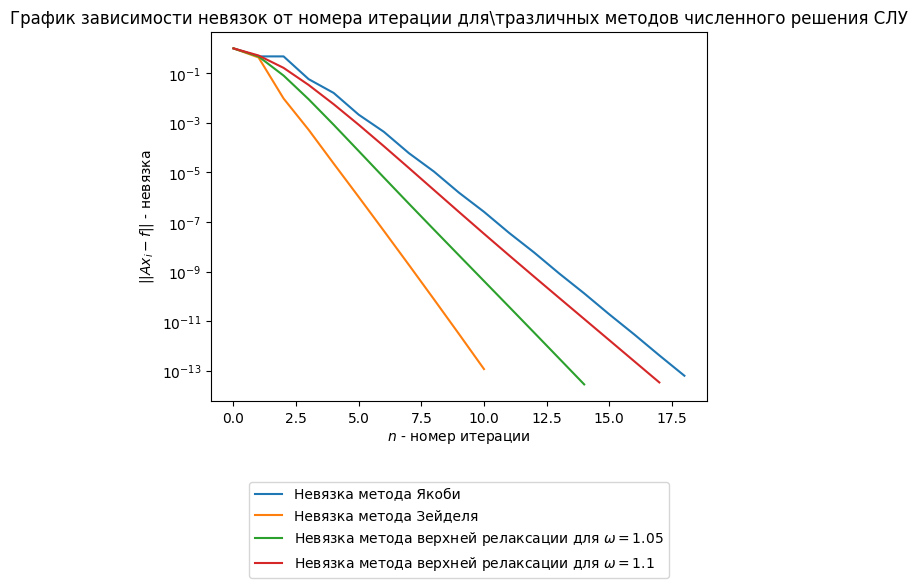

In [89]:
plt.plot(discrepancy_jacobi, label=f"Невязка метода Якоби")
plt.plot(discrepancy_zeydel, label=f"Невязка метода Зейделя")

for omega in discrepancy_upper_relacsations.keys():
    plt.plot(discrepancy_upper_relacsations[omega], label=f"Невязка метода верхней релаксации для $\\omega = {omega}$")

# plt.plot(discrepancy_gradient_descend, label="Невязка метода градиентного спуска")

# plt.xscale("log")
plt.yscale("log")
plt.xlabel("$n$ - номер итерации")
plt.ylabel("$||A x_i - f||$ - невязка")
plt.title(f"График зависимости невязок от номера итерации для\тразличных методов численного решения СЛУ")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()